In [1]:
import igraph
import wikipedia

In [5]:
def check_result(search_query, search_result):
    print type(search_query)
    print type(search_result)
    if(search_query.lower() == search_result.lower()):
        return True
    else:
        return False

In [4]:
g = igraph.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
#g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [5]:
layout = g.layout("kk")
# write(self, f, format=None, *args, **kwds)
g.write("test.gml", format="gml")

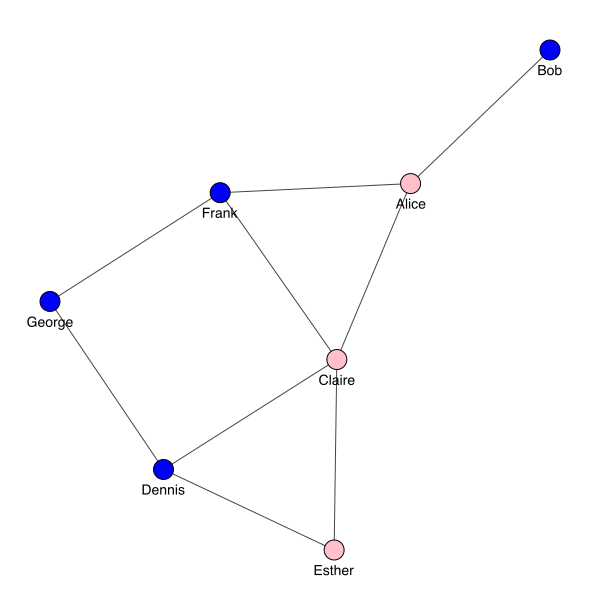

In [10]:
g.vs["label"] = g.vs["name"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
g.vs["label_dist"] = 1.5
igraph.plot(g, layout = layout, margin = 50)

In [1]:
# extend the igraph.Graph class, add this as an instance method
def add_page_to_graph(page_name, graph):
    page_vertex = None
    try:
        page_vertex = graph.vs.find(name=page_name)
        print "Found page in graph already. Moving on to next page"
        return graph
    except ValueError:
        print "Page didn't already exist in graph. Adding now."
        page_vertex = graph.add_vertex(name=page_name)
        results = wikipedia.search(page_name, results=2)
        if check_result(page_name, results[0]) == True:
            page_links = wikipedia.page(results[0]).links
            for link in page_links:
                try:
                    graph.add_vertex(name = str(link))
                    graph.add_edge(page_name, str(link))
                except UnicodeEncodeError:
                    pass
        return graph
    
# basic tests of check_result()
# NOTE: NO UNICODE-specific tests yet
results = wikipedia.search("Quantum Mechanics", results=2)
print "Search Results:"
print results

print "\nComparison of result 1:"
print check_result("Quantum Mechanics", results[0])

print "\nComparison of result 2:"
print check_result("Quantum Mechanics", results[1])

NameError: name 'wikipedia' is not defined

In [2]:
# test convert string to unicode via format string
test_var = "Hello World"
print (u'%s' % "testing")
print (u'%s' % test_var)

# test lowercase printing
print (u'%s' % test_var).lower()
print test_var.lower()

# test equality of lowercase printings
print ( (u'%s' % test_var).lower() == test_var.lower() )

print type((u'%s' % test_var).lower())
print type((test_var).lower())

testing
Hello World
hello world
hello world
True
<type 'unicode'>
<type 'str'>


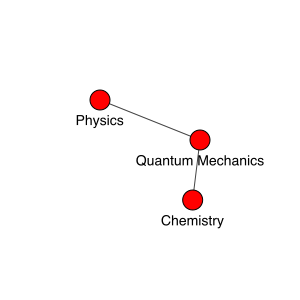

In [6]:
pages_graph = igraph.Graph([(0,1), (0,2)])
pages_graph.vs["name"] = ["Quantum Mechanics", "Physics", "Chemistry"]

visual_style = {}
visual_style["vertex_label"] = pages_graph.vs["name"]
visual_style["layout"] = pages_graph.layout("kk")
visual_style["margin"] = 100
visual_style["bbox"] = (300, 300)
visual_style["vertex_label_dist"] =1.5

igraph.plot(pages_graph, **visual_style)

Page didn't already exist in graph. Adding now.
<type 'str'>
<type 'unicode'>


Exception KeyboardInterrupt in <type 'exceptions.KeyboardInterrupt'> ignored


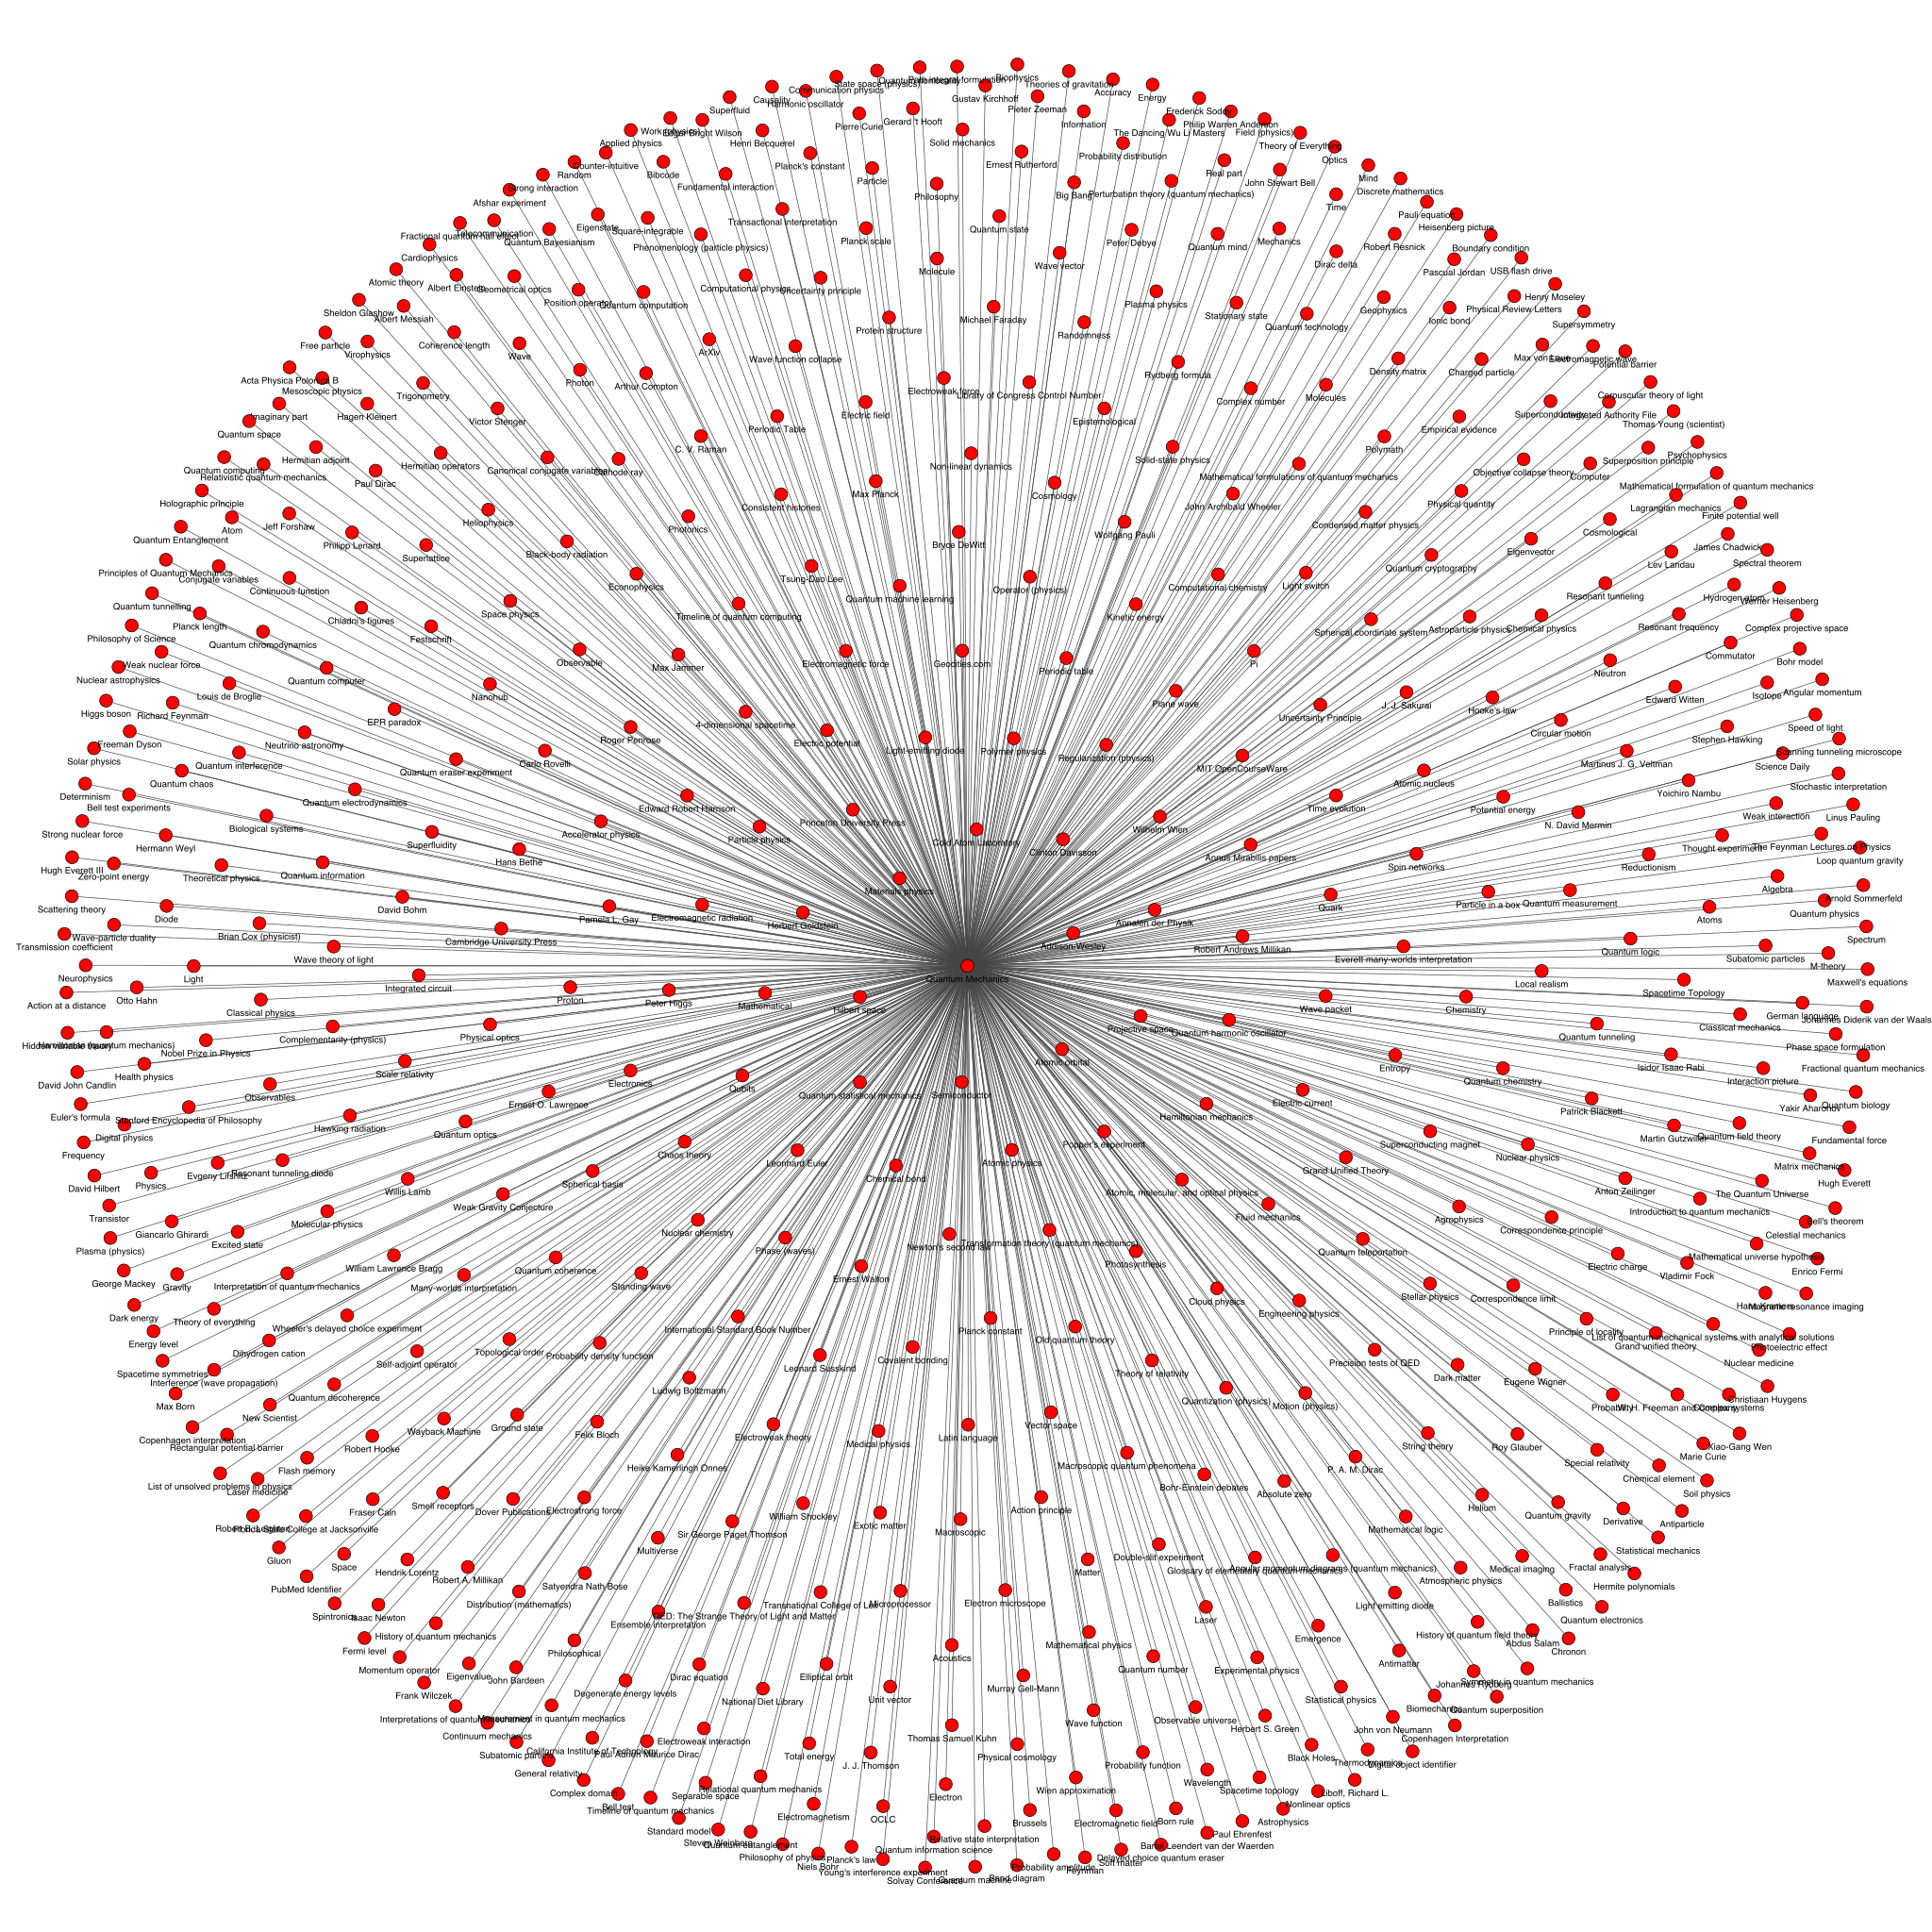

In [7]:
#pages_graph = igraph.Graph([(0,1), (0,2)])
#pages_graph.vs["name"] = ["Quantum Mechanics", "Physics", "Chemistry"]
pages_graph = igraph.Graph()
pages_graph = add_page_to_graph("Quantum Mechanics", pages_graph)

visual_style = {}
visual_style["vertex_label"] = pages_graph.vs["name"]
visual_style["layout"] = pages_graph.layout("kk")
visual_style["margin"] = 100
visual_style["bbox"] = (3000, 3000)
visual_style["vertex_label_dist"] =1.5

igraph.plot(pages_graph, **visual_style)

In [13]:
print visual_style["layout"].coords

[[-1.8715768131874868, -0.10273628528139363], [-3.1125951964952945, -0.3552704023992529], [-3.3397504394975193, 0.38590241614714], [-2.537805648082234, -1.1073557509799932], [-0.5672919097593346, 0.7449574637537816], [-1.4075124097990876, 1.1810344843932032], [-2.2830641862369236, 0.6048096475916851], [-0.32322964078081856, 0.04227778839363058], [-1.161221624742938, 0.3008664824045691], [-1.967400231656754, 0.6913333778339871], [-2.957468783823093, -1.2133355756441424], [-2.790428469094385, -0.823476021598755], [-1.467954364340712, 1.3987745209753422], [-2.323368649572208, -1.5838013747819861], [-1.2239233571150194, 0.8356439532039275], [-1.2602775697808257, -0.8290233925069694], [-3.3351667464542993, -0.07931852659929405], [-1.5066483108053625, -1.5295075317497984], [-1.2159533347640346, 1.0909494123781793], [-3.253580545104302, -0.7846034871710934], [-1.1623732084548337, 0.9573791859455265], [-3.0221563174639656, 0.18851660938213982], [-2.3380965345309814, 1.2956795680522935], [-2.96

In [15]:
import json

#def make_me_json(graph, layout):
def make_me_json():

    
    json_obj = {}
    json_obj["edges"] = []
    json_obj["nodes"] = []
    return json_obj

graph = igraph.Graph([(0,1), (0,2)])
graph.vs["name"] = ["Quantum Mechanics", "Physics", "Chemistry"]
print json.dumps(make_me_json)